In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

In [5]:
df= pd.read_csv(r'C:\Users\PAW PAW\Documents\my project\drive-download-20240313T023045Z-001\Task 1 YouTube Streamer Analysis\youtubers_df.csv')

In [6]:
df

Rank              Username           Categories   Suscribers  \
0       1               tseries       Música y baile  249500000.0   
1       2               MrBeast   Videojuegos, Humor  183500000.0   
2       3             CoComelon            Educación  165500000.0   
3       4              SETIndia                  NaN  162600000.0   
4       5         KidsDianaShow  Animación, Juguetes  113500000.0   
..    ...                   ...                  ...          ...   
995   996          hamzymukbang                  NaN   11700000.0   
996   997            Adaahqueen                  NaN   11700000.0   
997   998  LittleAngelIndonesia       Música y baile   11700000.0   
998   999          PenMultiplex                  NaN   11700000.0   
999  1000         OneindiaHindi  Noticias y Política   11700000.0   

            Country       Visits      Likes  Comments  \
0             India      86200.0     2700.0      78.0   
1    Estados Unidos  117400000.0  5300000.0   18500.0   
2           Unknown    7000000.0    24700.0       0.0   
3             India      15600.0      166.0       9.0   
4           Unknown    3900000.0    12400.0       0.0   
..              ...          ...        ...       ...   
995  Estados Unidos     397400.0    14000.0     124.0   
996           India    1100000.0    92500.0     164.0   
997         Unknown     211400.0      745.0       0.0   
998           India      14000.0       81.0       1.0   
999           India       2200.0       31.0       1.0   

                                                 Links  
0    http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1    http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2    http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3    http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4    http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...  
..                                                 ...  
995  http://youtube.com/channel/UCPKNKldggioffXPkSm...  
996  http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...  
997  http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...  
998  http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...  
999  http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...  

[1000 rows x 9 columns]

# 2. DATA EXPLORATION

In [7]:
df.shape

(1000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [9]:
df.describe()

Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000

Converts float values into int


In [10]:
df['Suscribers']=df['Suscribers'].astype('int64')
df['Visits']=df['Visits'].astype('int64')
df['Likes']=df['Likes'].astype('int64')
df['Comments']=df['Comments'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        1000 non-null   int64 
 1   Username    1000 non-null   object
 2   Categories  694 non-null    object
 3   Suscribers  1000 non-null   int64 
 4   Country     1000 non-null   object
 5   Visits      1000 non-null   int64 
 6   Likes       1000 non-null   int64 
 7   Comments    1000 non-null   int64 
 8   Links       1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [14]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

fill missing values with mode

In [15]:
df['Categories'] = df['Categories'].fillna(df['Categories'].mode()[0])

In [16]:
df['Country'].unique()

array(['India', 'Estados Unidos', 'Unknown', 'Brasil', 'México', 'Rusia',
       'Pakistán', 'Filipinas', 'Indonesia', 'Tailandia', 'Francia',
       'Colombia', 'Iraq', 'Japón', 'Ecuador', 'Argentina', 'Turquía',
       'Arabia Saudita', 'El Salvador', 'Bangladesh', 'Reino Unido',
       'Argelia', 'España', 'Perú', 'Egipto', 'Jordania', 'Marruecos',
       'Singapur', 'Somalia'], dtype=object)

In [18]:
df['Country'] = df['Country'].replace('Unknown', None)
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

In [19]:
df['Country'].unique()

array(['India', 'Estados Unidos', 'Brasil', 'México', 'Rusia', 'Pakistán',
       'Filipinas', 'Indonesia', 'Tailandia', 'Francia', 'Colombia',
       'Iraq', 'Japón', 'Ecuador', 'Argentina', 'Turquía',
       'Arabia Saudita', 'El Salvador', 'Bangladesh', 'Reino Unido',
       'Argelia', 'España', 'Perú', 'Egipto', 'Jordania', 'Marruecos',
       'Singapur', 'Somalia'], dtype=object)

In [21]:
df.head(20)

Rank              Username              Categories  Suscribers  \
0      1               tseries          Música y baile   249500000   
1      2               MrBeast      Videojuegos, Humor   183500000   
2      3             CoComelon               Educación   165500000   
3      4              SETIndia          Música y baile   162600000   
4      5         KidsDianaShow     Animación, Juguetes   113500000   
5      6             PewDiePie  Películas, Videojuegos   111500000   
6      7    LikeNastyaofficial                Juguetes   107500000   
7      8           VladandNiki     Animación, Juguetes   101400000   
8      9       zeemusiccompany          Música y baile    99700000   
9     10                   WWE             Videojuegos    97200000   
10    11             BLACKPINK          Música y baile    91300000   
11    12    GoldminesTelefilms          Música y baile    89700000   
12    13               SonySAB    Películas, Animación    85400000   
13    14  5MinuteCraftsYouTube               Películas    80300000   
14    15                   BTS          Música y baile    76500000   
15    16            HYBELABELS          Música y baile    72700000   
16    17                 zeetv          Música y baile    72500000   
17    18              Pinkfong     Animación, Juguetes    69600000   
18    19              ChuChuTV                Juguetes    67500000   
19    20             KondZilla          Música y baile    66599999   

           Country     Visits    Likes  Comments  \
0            India      86200     2700        78   
1   Estados Unidos  117400000  5300000     18500   
2   Estados Unidos    7000000    24700         0   
3            India      15600      166         9   
4   Estados Unidos    3900000    12400         0   
5   Estados Unidos    2400000   197300      4900   
6   Estados Unidos    2600000    28000         0   
7   Estados Unidos    4100000    22100         0   
8            India      74300     2600        32   
9   Estados Unidos     184500     6300       214   
10  Estados Unidos     863200   146900      3400   
11           India      34600      421        13   
12           India      35500      615        21   
13           India     164600      703        35   
14           India     969700   180300      7400   
15  Estados Unidos     440700    23900       932   
16           India       7300      144         1   
17  Estados Unidos     506400      397         0   
18  Estados Unidos     652100    17800         0   
19          Brasil      30400     1100         4   

                                                Links  
0   http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1   http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2   http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3   http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4   http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...  
5   http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...  
6   http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...  
7   http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...  
8   http://youtube.com/channel/UCFFbwnve3yF62-tVXk...  
9   http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...  
10  http://youtube.com/channel/UCOmHUn--16B90oW2L6...  
11  http://youtube.com/channel/UCyoXW-Dse7fURq30EW...  
12  http://youtube.com/channel/UC6-F5tO8uklgE9Zy8I...  
13  http://youtube.com/channel/UC295-Dw_tDNtZXFeAP...  
14  http://youtube.com/channel/UCLkAepWjdylmXSltof...  
15  http://youtube.com/channel/UC3IZKseVpdzPSBaWxB...  
16  http://youtube.com/channel/UCppHT7SZKKvar4Oc9J...  
17  http://youtube.com/channel/UCcdwLMPsaU2ezNSJU1...  
18  http://youtube.com/channel/UCBnZ16ahKA2DZ_T5W0...  
19  http://youtube.com/channel/UCffDXn7ycAzwL2LDlb...

In [22]:
df.shape

(1000, 9)

In [25]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [28]:
df.nunique()

Rank          1000
Username       994
Categories      45
Suscribers     274
Country         28
Visits         713
Likes          648
Comments       389
Links          994
dtype: int64

In [30]:
df.drop_duplicates(subset=['Username'],inplace=True)

In [31]:
df.nunique()

Rank          994
Username      994
Categories     45
Suscribers    273
Country        28
Visits        710
Likes         648
Comments      388
Links         994
dtype: int64

# 2. TREND ANALYSIS

Identify trends among the top youtube streamers. Which categories are the most popular?

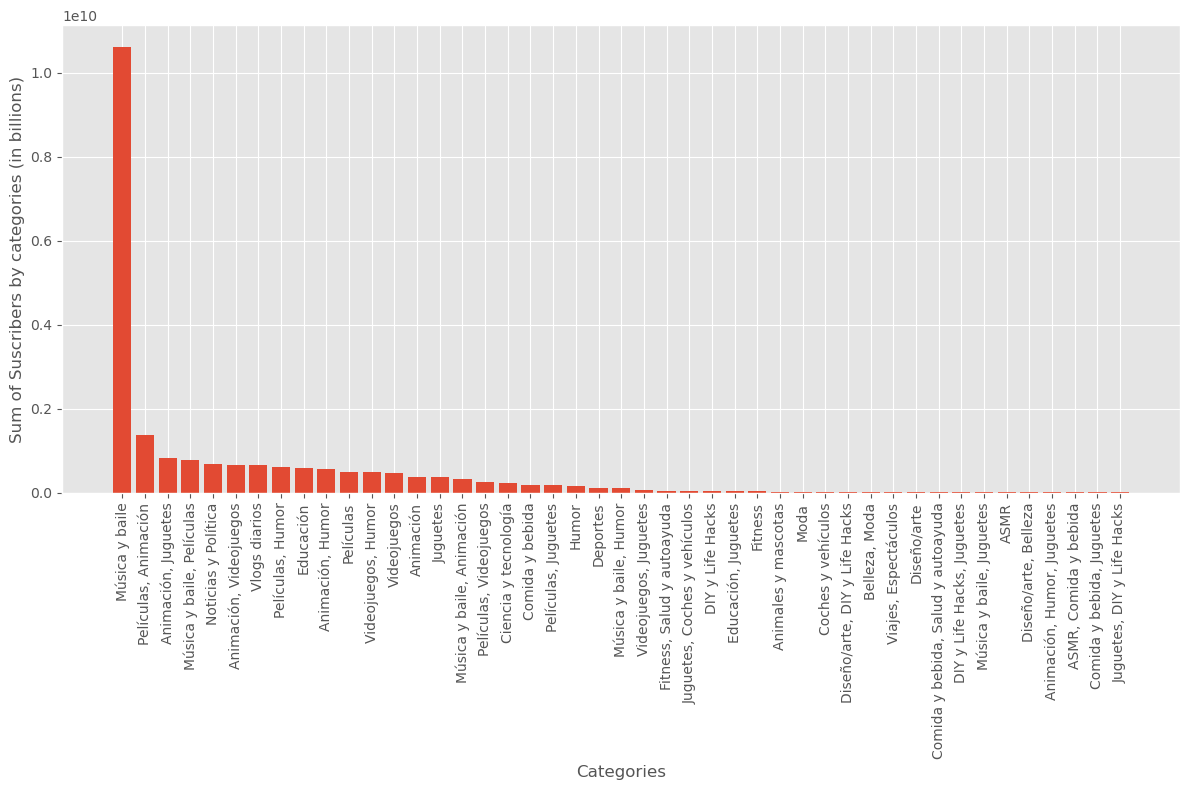

In [32]:
category_suscribers = df.groupby('Categories')['Suscribers'].sum().reset_index()
category_suscribers = category_suscribers.sort_values(by = 'Suscribers', ascending = False)
plt.bar(category_suscribers['Categories'],category_suscribers['Suscribers'])
plt.xlabel('Categories')
plt.ylabel('Sum of Suscribers by categories (in billions)')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Is there a correlation between the number of suscribers and the number of likes or comments?

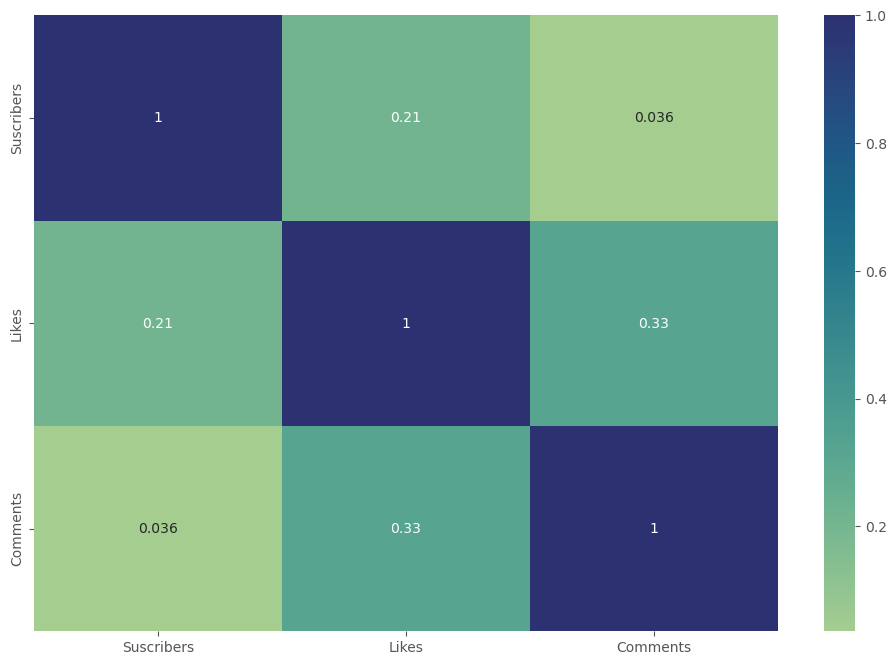

In [36]:
Data = df[['Suscribers','Likes','Comments']]
new_df =pd.DataFrame(Data)
corr_matrics = new_df.corr()
sns.heatmap(corr_matrics,annot=True,cmap="crest")
plt.show()

# 3. AUDIENCE STUDY

Analyze the distribution of streamers audiences by country. Are there regional preferences for specific content Categories?

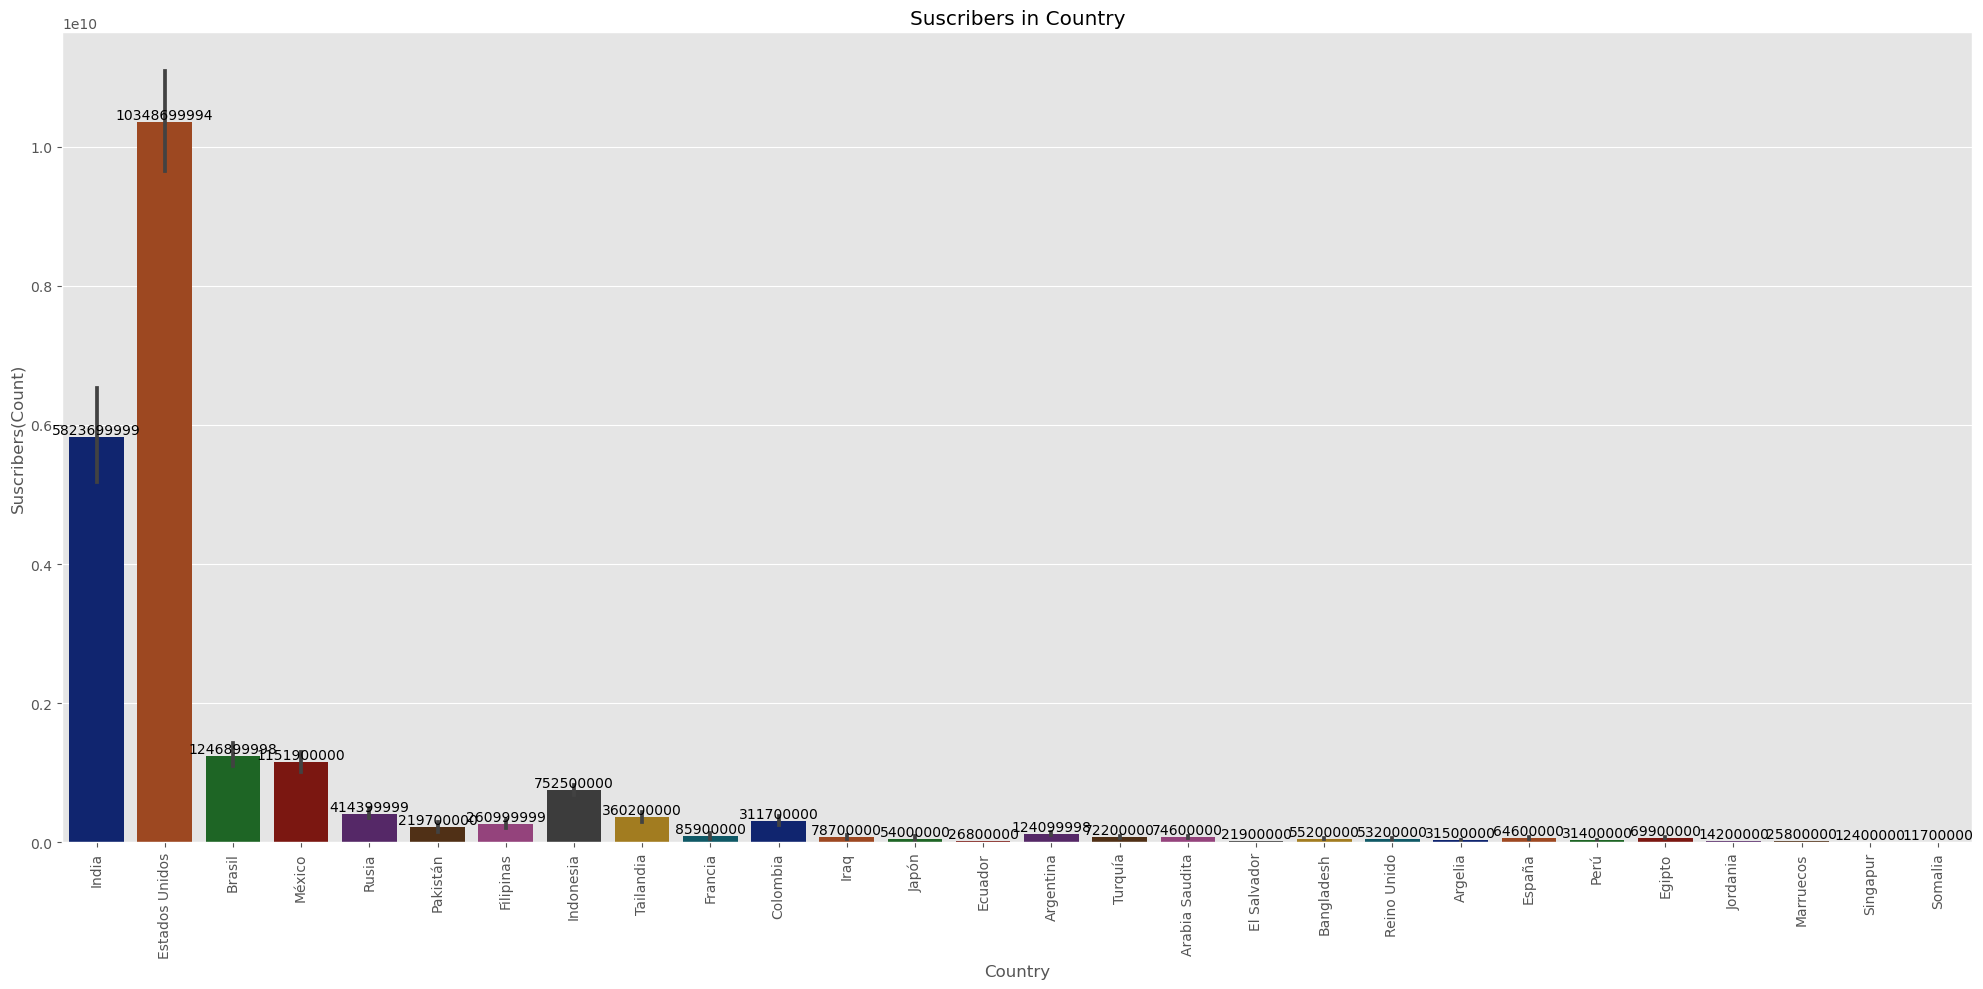

In [37]:
plt.figure(figsize=(20,10))
plt.title('Suscribers in Country')
ax = sns.barplot(data=df, x = 'Country',y='Suscribers',estimator = sum, palette='dark')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%d')
plt.ylabel('Suscribers(Count)')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

C:\Users\PAW PAW\AppData\Local\Temp\ipykernel_14804\1123835872.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['Categories','Country']).sum().reset_index()


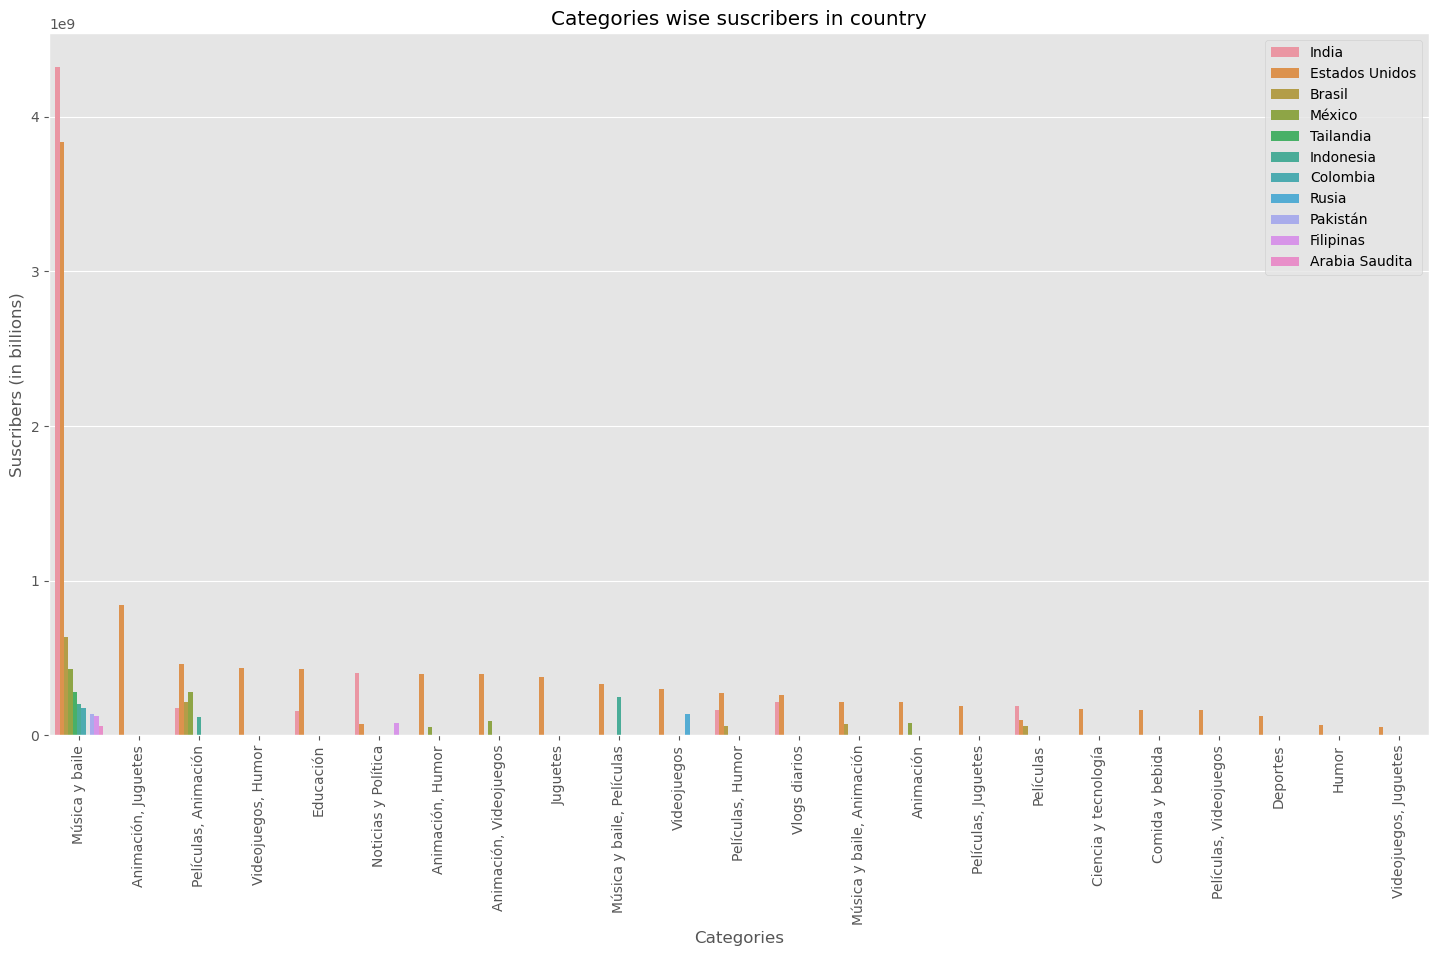

In [38]:
plt.figure(figsize=(15,8))
grouped_data = df.groupby(['Categories','Country']).sum().reset_index()
grouped = grouped_data.sort_values(by='Suscribers', ascending = False)[:50]
sns.barplot(data=grouped, x='Categories', y ='Suscribers', hue = 'Country')
plt.title('Categories wise suscribers in country')
plt.ylabel('Suscribers (in billions)')
plt.xlabel('Categories')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

# 4. PERFORMANCE METRICS

Calculate and visualize the average number of suscribers, visits, likes and comments.


Suscribers    21930382.28
Visits         1215600.92
Likes            53902.43
Comments          1296.16
dtype: float64


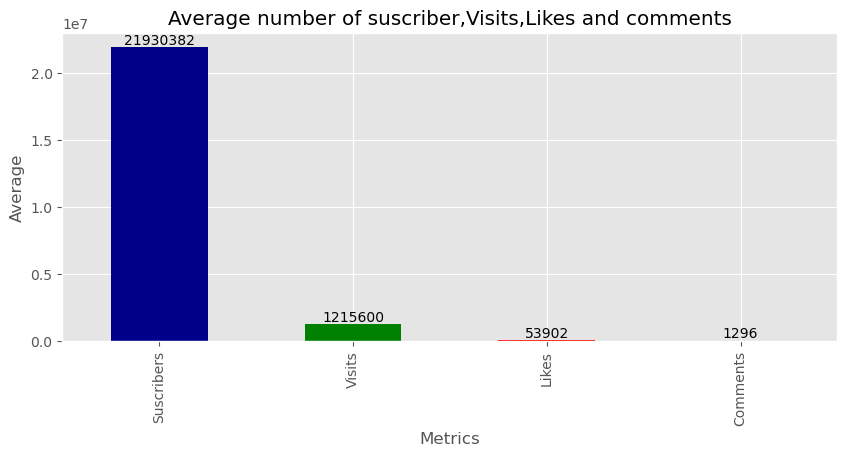

In [40]:
data = df[['Suscribers','Visits','Likes','Comments']]
averages= round(data.mean(),2)
print(averages)

plt.figure(figsize = (10,4))
color=['darkblue','green','red','black']
plt.title('Average number of suscriber,Visits,Likes and comments')
ax = averages.plot(kind='bar', color = color)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%d')
plt.xlabel('Metrics')
plt.ylabel('Average')
plt.show()

Are there patterns or anomalies in these metrics?


In [41]:
import plotly.express as px
fig=px.box(data_frame=data)
fig.show()

# 5. CONTENT CATEGORIES

Explore the distirbution of content categories. which categories have the highest number of streamers?


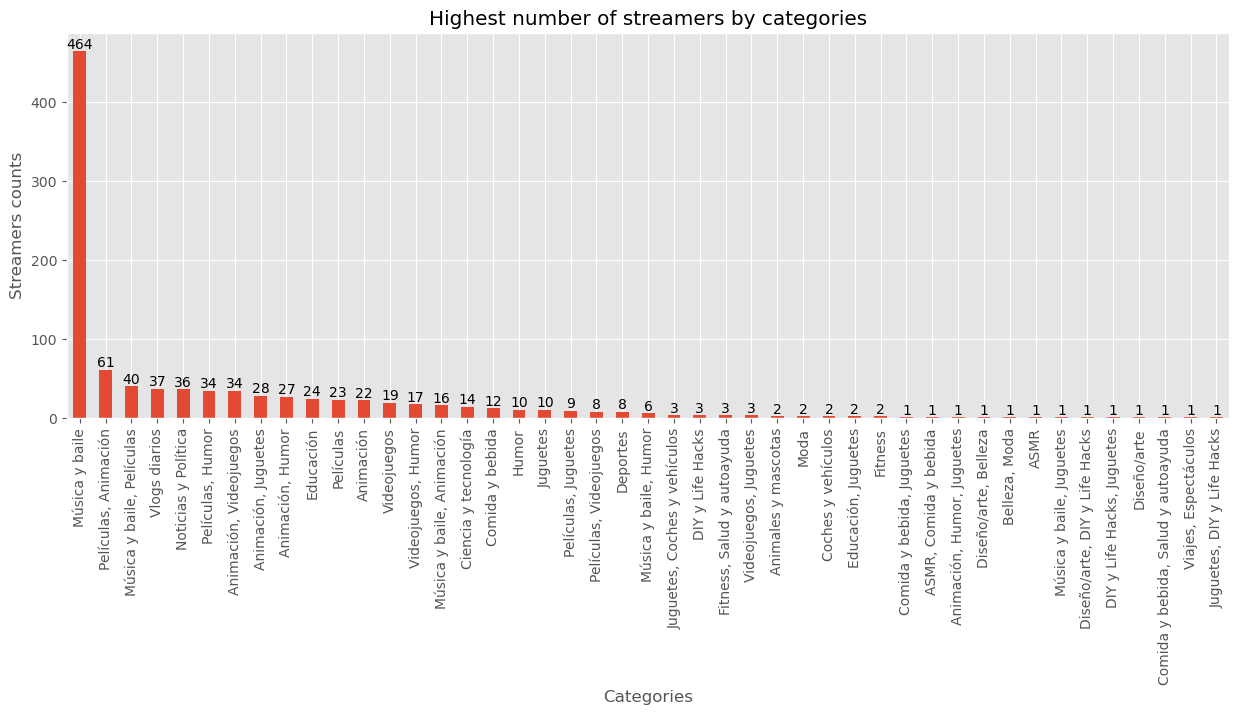

In [42]:
plt.figure(figsize=(15,5))
plt.title("Highest number of streamers by categories")
ax = df['Categories'].value_counts(ascending = False).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Categories')
plt.ylabel('Streamers counts')
plt.xticks(rotation = 90)
plt.show()

Are there specific categories with exceptional performance metrics?


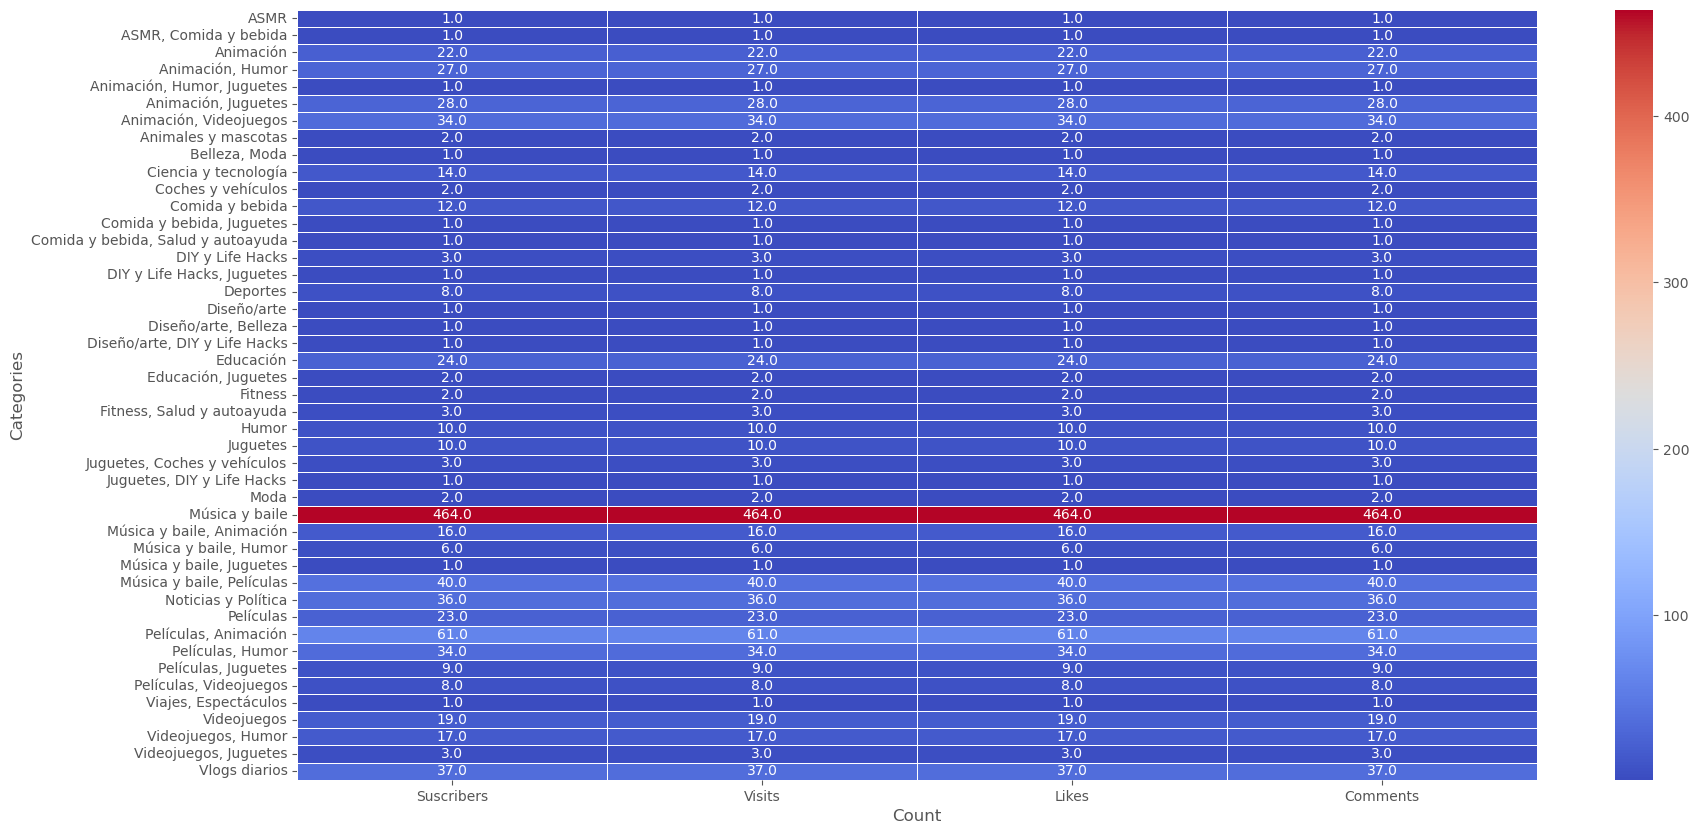

In [43]:
plt.figure(figsize=(20,10))
grouped_data = df.groupby('Categories')
performance_metric = grouped_data.count()
sns.heatmap(performance_metric[['Suscribers','Visits','Likes','Comments']],annot=True,cmap="coolwarm",fmt='.1f', linewidths=.5)
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

# BRAND AND COLLABORATIONS

Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

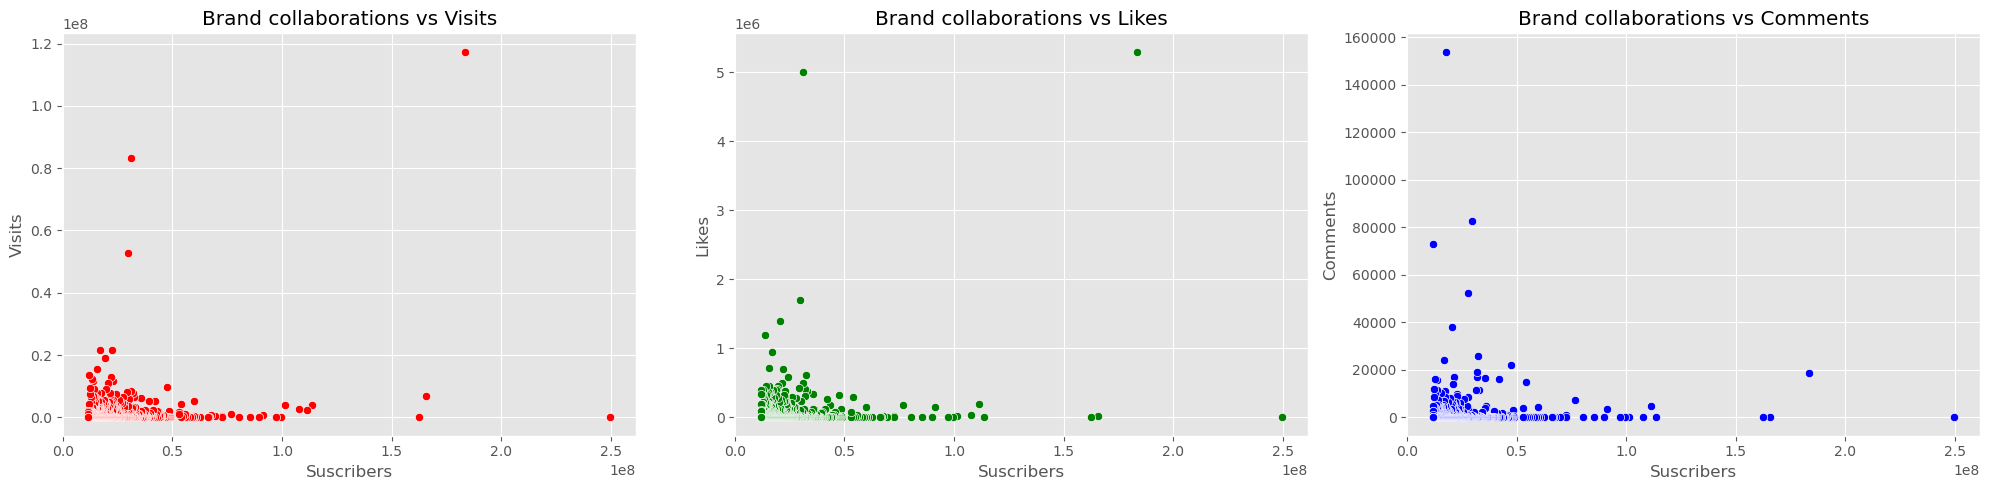

In [45]:
plt.figure(figsize=(20,5))
threshold = 50000
ax=plt.subplot(1,3,1)
sns.scatterplot(data=df, x = 'Suscribers', y= 'Visits', color = 'red', ax=ax)
plt.title('Brand collaborations vs Visits')

ax=plt.subplot(1,3,2)
sns.scatterplot(data=df, x = 'Suscribers', y= 'Likes', color = 'green', ax=ax)
plt.title('Brand collaborations vs Likes')

ax=plt.subplot(1,3,3)
sns.scatterplot(data=df, x = 'Suscribers', y= 'Comments', color = 'blue', ax=ax)
plt.title('Brand collaborations vs Comments')

plt.tight_layout()
plt.show()

# TOP PERFORMING CONTENT CREATORS

Identifying the streamers with above average performance metrics

In [46]:
#Calculating Averages for every performance metrics
avg_Suscribers = df['Suscribers'].mean()
avg_Visits = df['Visits'].mean()
avg_Likes = df['Likes'].mean()
avg_Comments = df['Comments'].mean()

In [47]:
avg_Suscribers,avg_Visits,avg_Likes,avg_Comments

(21930382.280684106, 1215600.9205231387, 53902.42957746479, 1296.1569416498994)

In [49]:
top_streamers = df[(df['Suscribers'] > avg_Suscribers) &
                     (df['Likes'] > avg_Likes) &
                     (df['Comments'] > avg_Comments)&
                  (df['Visits'] > avg_Visits)].reset_index()

In [50]:
top_10_streamers = top_streamers.head(10).sort_values(by=['Suscribers','Likes','Visits','Comments'], ascending = False)

In [51]:
top_10_streamers

index  Rank         Username              Categories  Suscribers  \
0      1     2          MrBeast      Videojuegos, Humor   183500000   
1      5     6        PewDiePie  Películas, Videojuegos   111500000   
2     26    27      dudeperfect             Videojuegos    59700000   
3     34    35      TaylorSwift          Música y baile    54100000   
4     39    40      JuegaGerman    Películas, Animación    48600000   
5     43    44         A4a4a4a4        Animación, Humor    47300000   
6     58    59        Mikecrack    Películas, Animación    43400000   
7     62    63   KimberlyLoaiza          Música y baile    42100000   
8     64    65  luisitocomunica          Música y baile    41100000   
9     70    71      JessNoLimit    Películas, Animación    39600000   

          Country     Visits    Likes  Comments  \
0  Estados Unidos  117400000  5300000     18500   
1  Estados Unidos    2400000   197300      4900   
2  Estados Unidos    5300000   156500      4200   
3  Estados Unidos    4300000   300400     15000   
4          México    2000000   117100      3000   
5           Rusia    9700000   330400     22000   
6          México    2200000   183400      1800   
7          México    5300000   271300     16000   
8          México    2500000   128900      1800   
9       Indonesia    1300000    73500      1600   

                                               Links  
0  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
1  http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...  
2  http://youtube.com/channel/UCRijo3ddMTht_IHyNS...  
3  http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...  
4  http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...  
5  http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...  
6  http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...  
7  http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...  
8  http://youtube.com/channel/UCECJDeK0MNapZbpaOz...  
9  http://youtube.com/channel/UCvh1at6xpV1ytYOAzx...